<a href="https://colab.research.google.com/github/sudo-rm-f-rish/guess-the-doodle/blob/master/quick_draw_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive/
%cd quick_draw_data/
%ls

/content/gdrive/My Drive
/content/gdrive/My Drive/quick_draw_data
aircraft_carrier.npy  firetruck.npy        popsicle.npy
airplane.npy          fish.npy             postcard.npy
alarm_clock.npy       flamingo.npy         potato.npy
ambulance.npy         flashlight.npy       power_outlet.npy
angel.npy             flip_flops.npy       purse.npy
animal_migration.npy  floor_lamp.npy       rabbit.npy
ant.npy               flower.npy           raccoon.npy
anvil.npy             flying_saucer.npy    radio.npy
apple.npy             foot.npy             rainbow.npy
arm.npy               fork.npy             rain.npy
asparagus.npy         frog.npy             rake.npy
axe.npy               frying_pan.npy       remote_control.npy
backpack.npy          garden_hose.npy      rhinoceros.npy
banana.npy            garden.npy           rifle.npy
bandage.npy           giraffe.npy          river.npy
barn.npy              goatee.npy           roller_coaster.npy
baseball_bat.npy      golf_club.npy        rol

In [ ]:
#imports
import glob
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [ ]:
files = glob.glob('./*npy')
class_name_list = []
X = np.empty([0, 784])
y = np.empty([0])
for i, file in enumerate(files):
    class_name, _ = os.path.splitext(os.path.basename(file))
    class_name_list.append(class_name)
    print('Reading data from file: {}'.format(class_name))
    data = np.load(file)
    labels = np.full(data.shape[0], i)
    X = np.concatenate((X, data), axis=0)
    y = np.append(y, labels)

Reading data from file: aircraft_carrier
Reading data from file: airplane
Reading data from file: alarm_clock
Reading data from file: ambulance
Reading data from file: angel
Reading data from file: animal_migration
Reading data from file: ant
Reading data from file: anvil
Reading data from file: apple
Reading data from file: arm
Reading data from file: asparagus
Reading data from file: axe
Reading data from file: backpack
Reading data from file: banana
Reading data from file: bandage
Reading data from file: barn
Reading data from file: baseball
Reading data from file: baseball_bat
Reading data from file: basket
Reading data from file: basketball
Reading data from file: bat
Reading data from file: bathtub
Reading data from file: beach
Reading data from file: bear
Reading data from file: beard
Reading data from file: bed
Reading data from file: bee
Reading data from file: belt
Reading data from file: bench
Reading data from file: bicycle
Reading data from file: binoculars
Reading data fr

In [ ]:
X = X.reshape(X.shape[0], 28, 28, 1).astype('float32')
y = y.astype('int')

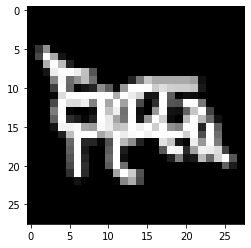

ant


In [ ]:
index = 12029
plt.imshow(X[index].reshape(28, 28), cmap='gray')
plt.show()
print(class_name_list[y[index]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=0)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
num_of_classes = len(class_name_list)
y_train = keras.utils.to_categorical(y_train, num_of_classes)
y_test = keras.utils.to_categorical(y_test, num_of_classes)

In [ ]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),padding='same',input_shape=(28,28,1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Convolution2D(128, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(2000, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(345, activation='softmax')) 
# Train model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

In [ ]:
with tf.device('/device:GPU:0'):
    model.fit(X_train, 
            y_train, 
            validation_split=0.1, 
            batch_size = 256, 
            epochs=10)

Epoch 1/10
1941/1941 [==============================] - 40s 21ms/step - loss: 3.1689 - top_k_categorical_accuracy: 0.5655 - val_loss: 2.3389 - val_top_k_categorical_accuracy: 0.7365
Epoch 2/10
1941/1941 [==============================] - 40s 21ms/step - loss: 2.2120 - top_k_categorical_accuracy: 0.7582 - val_loss: 2.0437 - val_top_k_categorical_accuracy: 0.7861
Epoch 3/10
1941/1941 [==============================] - 40s 21ms/step - loss: 1.9762 - top_k_categorical_accuracy: 0.7958 - val_loss: 1.8917 - val_top_k_categorical_accuracy: 0.8088
Epoch 4/10
1941/1941 [==============================] - 41s 21ms/step - loss: 1.8394 - top_k_categorical_accuracy: 0.8158 - val_loss: 1.7841 - val_top_k_categorical_accuracy: 0.8234
Epoch 5/10
1941/1941 [==============================] - 40s 21ms/step - loss: 1.7440 - top_k_categorical_accuracy: 0.8294 - val_loss: 1.7239 - val_top_k_categorical_accuracy: 0.8336
Epoch 6/10
1941/1941 [==============================] - 40s 21ms/step - loss: 1.6744 - top

In [ ]:
with tf.device('/device:GPU:0'):
    score = model.evaluate(X_test, y_test)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

4313/4313 [==============================] - 22s 5ms/step - loss: 1.6256 - top_k_categorical_accuracy: 0.8460
Test accuarcy: 84.60%


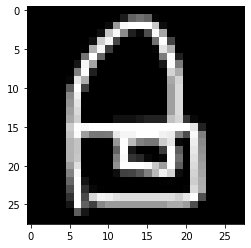

purse


In [ ]:
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.show()
print(class_name_list[np.argmax(y_test[index])])

In [ ]:
image = X_test[index]
image = np.expand_dims(image, axis=0)
predictions = model.predict(image)
for p in predictions.argsort().reshape(-1)[-5:]:
    print('{} : {:.2f}'.format(class_name_list[p], predictions.reshape(-1)[p] * 100))

toilet : 1.32
bucket : 1.83
cooler : 1.92
basket : 7.18
purse : 83.97


In [ ]:
%cd ..
%ls

/content/gdrive/My Drive
collect_quick_draw_data  quick_draw_cnn    quickdraw_predict.ipynb
model.h5                 quick_draw_data/


In [ ]:
model.save('model.h5')

In [ ]:
np.save('classes.npy', class_name_list)

In [ ]:
%ls

classes.npy              model.h5        quick_draw_data/
collect_quick_draw_data  quick_draw_cnn  quickdraw_predict.ipynb
